## **For Sketches**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from tensorflow.python.keras.layers import Dense,Input
from tensorflow.python.keras.models import Model

In [0]:
input_vec=Input(shape=(4096,))
encoder_layer1=Dense(1024,activation='relu')(input_vec)
encoder_layer2=Dense(256,activation='relu')(encoder_layer1)
encoded_vec=Dense(92,activation='relu')(encoder_layer2)

decoder_layer1=Dense(256,activation='relu')(encoded_vec)
decoder_layer2=Dense(1024,activation='relu')(decoder_layer1)
output=Dense(4096,activation='relu')(decoder_layer2)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
autoencoder_sktch=Model(input_vec,output)

In [0]:
autoencoder_sktch.compile(optimizer='Adam', loss='mean_squared_error')

Instructions for updating:
Use tf.cast instead.


In [0]:
def Convert(dicts,dictionary):
  for a,b in dicts:
    dictionary.setdefault(a,[]).append(b)

## **Importing Sketch Training Images**

In [0]:
import os
import numpy as np
dictionary={}
training_files='/content/gdrive/My Drive/Feature_Vectors/Sketchs/Training'
labels=os.listdir(training_files)
dicts=list(enumerate(labels))
Convert(dicts,dictionary)
x_train_skt=[]
y_train=[]
for label in labels:
  skt_fea_names=os.listdir(os.path.join(training_files,label))
  #label_list
  for skt in skt_fea_names:
    skt_fea_path=os.path.join(training_files,label,skt)
    skt_fea=np.load(skt_fea_path)
    x_train_skt.append(skt_fea)
    #y_train.append(label+'-'+img)


In [0]:
x_train_skt=np.asarray(x_train_skt)

In [0]:
x_train_skt.shape

(5888, 4096)

In [0]:
#---------------------dictionary mad for labels
list(dictionary.keys())[list(dictionary.values()).index(['alarm clock'])]

2

## **Importing Validation files for sketches**

In [0]:
val_files='/content/gdrive/My Drive/Feature_Vectors/Sketchs/Validation'
labels=os.listdir(val_files)
x_val_skt=[]
y_val=[]
for label in labels:
  skt_names=os.listdir(os.path.join(val_files,label))
  for skt in skt_names:
    skt_fea_path=os.path.join(val_files,label,skt)
    skt_fea=np.load(skt_fea_path)
    x_val_skt.append(skt_fea)
    #y_val.append(label+'-'+img)

In [0]:
x_val_skt=np.asarray(x_val_skt)

In [0]:
x_val_skt.shape

(736, 4096)

In [0]:
x=autoencoder_sktch.fit(x_train_skt,x_train_skt,epochs=30,batch_size=128,shuffle=True,validation_data=(x_val_skt,x_val_skt))#34

Train on 5888 samples, validate on 736 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
5888/5888 [==============================] - 2s 407us/sample - loss: 1.1442 - val_loss: 0.8075
Epoch 2/30
5888/5888 [==============================] - 1s 88us/sample - loss: 0.7088 - val_loss: 0.6113
Epoch 3/30
5888/5888 [==============================] - 1s 87us/sample - loss: 0.5570 - val_loss: 0.5102
Epoch 4/30
5888/5888 [==============================] - 1s 90us/sample - loss: 0.4716 - val_loss: 0.4580
Epoch 5/30
5888/5888 [==============================] - 1s 89us/sample - loss: 0.4186 - val_loss: 0.4238
Epoch 6/30
5888/5888 [==============================] - 1s 91us/sample - loss: 0.3821 - val_loss: 0.4006
Epoch 7/30
5888/5888 [==============================] - 1s 87us/sample - loss: 0.3548 - val_loss: 0.3783
Epoch 8/30
5888/5888 [==============================] - 1s 88us/sample - loss: 0.3317 - val_loss: 0.3632
Epoch 9/30
5888/5888 [==============================] - 1s 86us/

In [0]:
x.history.keys()

dict_keys(['loss', 'val_loss'])

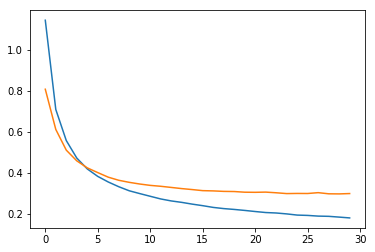

In [0]:
import matplotlib.pyplot as plt
plt.plot(x.history['loss'])
plt.plot(x.history['val_loss'])

In [0]:
encoded_layer_sketch_model=Model(input_vec,encoded_vec)

In [0]:
#encoded_layer_sketch_model.get_weights()

In [0]:
#autoencoder_sktch.get_weights()

## **Encoder For Images**

In [0]:
input_vec=Input(shape=(4096,))
encoder_layer1=Dense(1024,activation='relu')(input_vec)
encoder_layer2=Dense(256,activation='relu')(encoder_layer1)
encoded_vec=Dense(92,activation='relu')(encoder_layer2)

decoder_layer1=Dense(256,activation='relu')(encoded_vec)
decoder_layer2=Dense(1024,activation='relu')(decoder_layer1)
output=Dense(4096,activation='relu')(decoder_layer2)

In [0]:
autoencoder_img=Model(input_vec,output)
#Encoder_model_images=Model(input_vec,encoded_vec)

In [0]:
autoencoder_img.compile(optimizer='Adam', loss='mean_squared_error')

In [0]:
img_training_files='/content/gdrive/My Drive/Feature_Vectors/Image/Training'
labels=os.listdir(img_training_files)
x_train_img=[]
y_train_img=[]
for label in labels:
  img_names=os.listdir(os.path.join(img_training_files,label))
  for img in img_names:
    img_fea_path=os.path.join(img_training_files,label,img)
    img_fea=np.load(img_fea_path)
    x_train_img.append(img_fea)
    #y_train_img.append(label+'-'+img)

In [0]:
x_train_img=np.asarray(x_train_img)

In [0]:
x_train_img.shape

(5888, 4096)

## **Importing validation data for images**

In [0]:
val_files_img='/content/gdrive/My Drive/Feature_Vectors/Image/Validation'
labels=os.listdir(val_files_img)
x_val_img=[]
y_val_img=[]
for label in labels:
  img_names=os.listdir(os.path.join(val_files,label))
  for img in img_names:
    img_fea_path=os.path.join(val_files,label,img)
    img_fea=np.load(img_fea_path)
    x_val_img.append(img_fea)
    #y_val_img.append(label+'-'+img)

In [0]:
x_val_img=np.asarray(x_val_img)

In [0]:
x_val_img.shape

(736, 4096)

In [0]:
y=autoencoder_img.fit(x_val_img,x_val_img,epochs=34,batch_size=128,shuffle=True,validation_data=(x_val_img,x_val_img))#34

Train on 736 samples, validate on 736 samples
Epoch 1/34
736/736 [==============================] - 1s 1ms/sample - loss: 1.5581 - val_loss: 1.3466
Epoch 2/34
736/736 [==============================] - 0s 132us/sample - loss: 1.3205 - val_loss: 1.2684
Epoch 3/34
736/736 [==============================] - 0s 133us/sample - loss: 1.2272 - val_loss: 1.1469
Epoch 4/34
736/736 [==============================] - 0s 126us/sample - loss: 1.1019 - val_loss: 1.0326
Epoch 5/34
736/736 [==============================] - 0s 116us/sample - loss: 1.0087 - val_loss: 0.9598
Epoch 6/34
736/736 [==============================] - 0s 121us/sample - loss: 0.9346 - val_loss: 0.8801
Epoch 7/34
736/736 [==============================] - 0s 113us/sample - loss: 0.8568 - val_loss: 0.8048
Epoch 8/34
736/736 [==============================] - 0s 120us/sample - loss: 0.7879 - val_loss: 0.7402
Epoch 9/34
736/736 [==============================] - 0s 117us/sample - loss: 0.7288 - val_loss: 0.6892
Epoch 10/34
736/736 

In [0]:
y.history.keys()

dict_keys(['loss', 'val_loss'])

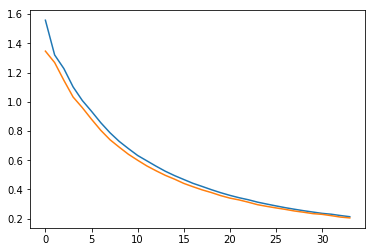

In [0]:
plt.plot(y.history['loss'])
plt.plot(y.history['val_loss'])

In [0]:
encoded_layer_img_model=Model(input_vec,encoded_vec)

In [0]:
#encoded_layer_img_model.get_weights()

In [0]:
#autoencoder_img.get_weights()

In [0]:
#encoded_layer_sketch_model.get_weights()

In [0]:
training_files_='/content/gdrive/My Drive/Feature_Vectors/Sketchs/Training'
labels_=os.listdir(training_files_)
training_query_skt=[]
training_query_label=[]
#z=0
for label in labels_:
  skt_names=os.listdir(os.path.join(training_files_,label))
  for skt in skt_names:
    skt_fea_path=os.path.join(training_files_,label,skt)
    skt_fea=np.load(skt_fea_path)
    skt_fea = img_fea.reshape(4096,1).T
    #x_train.append(img_fea)
    training_query_skt.append(encoded_layer_sketch_model.predict(skt_fea))
    training_query_label.append(list(dictionary.keys())[list(dictionary.values()).index([label])])
  #z=z+1


    
testing_files='/content/gdrive/My Drive/Feature_Vectors/Sketchs/Testing'
labels=os.listdir(testing_files)
testing_query_skt=[]
testing_query_label=[]
#z=0
for label in labels:
  skt_names=os.listdir(os.path.join(testing_files,label))
  for skt in skt_names:
    skt_fea_path=os.path.join(testing_files,label,skt)
    skt_fea=np.load(skt_fea_path)
    skt_fea = skt_fea.reshape(4096,1).T
    #x_train.append(img_fea)
    testing_query_skt.append(encoded_layer_sketch_model.predict(skt_fea))
    testing_query_label.append(list(dictionary.keys())[list(dictionary.values()).index([label])])
  #z=z+1

In [0]:
training_files='/content/gdrive/My Drive/Feature_Vectors/Image/Training'
labels=os.listdir(training_files)
training_search_img=[]
training_search_img_label=[]
z=0
for label in labels:
  img_names=os.listdir(os.path.join(training_files,label))
  for img in img_names:
    img_fea_path=os.path.join(training_files,label,img)
    img_fea=np.load(img_fea_path)
    img_fea = img_fea.reshape(4096,1).T
    #x_train.append(img_fea)
    training_search_img.append(encoded_layer_img_model.predict(img_fea))
    training_search_img_label.append(list(dictionary.keys())[list(dictionary.values()).index([label])])
  z=z+1


    
testing_files_='/content/gdrive/My Drive/Feature_Vectors/Image/Testing'
labels=os.listdir(testing_files_)
testing_search_img=[]
testing_search_img_label=[]
z=0
for label in labels:
  img_names=os.listdir(os.path.join(testing_files_,label))
  for img in img_names:
    img_fea_path=os.path.join(testing_files_,label,img)
    img_fea=np.load(img_fea_path)
    img_fea = img_fea.reshape(4096,1).T
    #x_train.append(img_fea)
    testing_search_img.append(encoded_layer_img_model.predict(img_fea))
    testing_search_img_label.append(list(dictionary.keys())[list(dictionary.values()).index([label])])
  z=z+1


In [62]:
training_query_skt

array([[14.533626 ,  6.2833176, 29.514858 , ...,  0.       ,  0.       ,
        25.512844 ],
       [14.533626 ,  6.2833176, 29.514858 , ...,  0.       ,  0.       ,
        25.512844 ],
       [14.533626 ,  6.2833176, 29.514858 , ...,  0.       ,  0.       ,
        25.512844 ],
       ...,
       [14.533626 ,  6.2833176, 29.514858 , ...,  0.       ,  0.       ,
        25.512844 ],
       [14.533626 ,  6.2833176, 29.514858 , ...,  0.       ,  0.       ,
        25.512844 ],
       [14.533626 ,  6.2833176, 29.514858 , ...,  0.       ,  0.       ,
        25.512844 ]], dtype=float32)

In [63]:
training_search_img_label

array([ 2,  2,  2, ..., 76, 76, 76])

In [0]:
from scipy.spatial.distance import cdist
def eval_MAP_K(query_set, search_set, query_label, search_set_label, K):
    query_class_arr = query_set
    search_set_class_arr = search_set
    query_label_arr = query_label
    query_label_arr.astype(int)
    search_set_label_arr = search_set_label
    search_set_label_arr.astype(int)
    num_query_sample = query_label_arr.shape[0]
    dist_q_search_class = cdist(query_class_arr,search_set_class_arr,metric='euclidean')
    AP=0
    pre=0
    for query_count in range(0,num_query_sample):
      actual_label = query_label_arr[query_count]
      value=dist_q_search_class[query_count,:]
      sorted_value_idx=value.argsort()
      predicted_K_label = search_set_label_arr[sorted_value_idx[0:K]]
      L=np.sum((np.in1d(predicted_K_label,actual_label)).astype(int))
      P=0
      for r in range(0,K):
        rtr_label_r = predicted_K_label[:(r+1)]
        l=np.sum((np.in1d(rtr_label_r,actual_label)).astype(int))
        precision=l/(r+1)
        if actual_label==predicted_K_label[r]:
          delta=1
        else:
          delta=0
        P=P+(precision*delta)
      if L!=0:
        AP=AP+((1/L)*P)
    map_K=AP/num_query_sample
    return map_K,AP

In [0]:
training_query_skt=np.squeeze(np.asarray(training_query_skt))
training_search_img=np.squeeze(np.asarray(training_search_img))
training_query_label=np.asarray(training_query_label)
training_search_img_label=np.asarray(training_search_img_label)
eval_MAP_K(training_query_skt,training_search_img,training_query_label,training_search_img_label,100)

(0.0230370507796937, 135.6421549908365)

In [0]:
training_search_img_label

array([ 2,  2,  2, ..., 76, 76, 76])

In [0]:
training_query_label

array([ 0,  0,  0, ..., 91, 91, 91])

In [0]:
training_query_skt.shape

(5888, 92)

In [0]:
training_search_img.shape

(5888, 92)

In [0]:
#from scipy.spatial.distance import cdist
testing_query_skt=np.squeeze(np.asarray(testing_query_skt))
testing_search_img=np.squeeze(np.asarray(testing_search_img))
testing_query_label=np.asarray(testing_query_label)
testing_search_img_label=np.asarray(testing_search_img_label)
eval_MAP_K(testing_query_skt,testing_search_img,testing_query_label,testing_search_img_label,100)

(0.03066968453045567, 22.572887814415374)

In [0]:
testing_query_skt

array([[12.227477 ,  3.4101791, 13.113593 , ...,  0.       ,  0.       ,
        14.786407 ],
       [ 8.616035 , 20.137459 , 16.183994 , ...,  0.       ,  0.       ,
        17.534689 ],
       [38.82635  , 12.087339 , 17.430033 , ...,  0.       ,  0.       ,
        24.227293 ],
       ...,
       [15.763426 , 12.713722 , 19.52228  , ...,  0.       ,  0.       ,
         8.72383  ],
       [18.40499  , 27.832382 , 16.78171  , ...,  0.       ,  0.       ,
         9.632037 ],
       [ 7.469562 , 12.955534 , 16.818092 , ...,  0.       ,  0.       ,
        10.433047 ]], dtype=float32)

In [0]:
testing_search_img

array([[ 0.        ,  0.        ,  7.2654777 , ..., 10.552947  ,
         0.30501112,  0.        ],
       [ 0.        ,  0.        , 17.54749   , ..., 23.802572  ,
         2.0242493 ,  0.        ],
       [ 0.        ,  0.        ,  9.381086  , ..., 15.360033  ,
        11.392135  ,  0.        ],
       ...,
       [ 0.        ,  0.        , 11.294694  , ..., 20.62872   ,
        10.574252  ,  0.        ],
       [ 0.        ,  0.        , 11.341565  , ..., 23.89536   ,
        11.623372  ,  0.        ],
       [ 0.        ,  0.        ,  4.7182236 , ..., 15.308477  ,
         3.4123461 ,  0.        ]], dtype=float32)

In [0]:
testing_query_label

array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
       12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14,
       14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 19,
       19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21,
       21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23,
       23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25,
       25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27,
       27, 27, 27, 28, 28

In [0]:
testing_search_img_label

array([52, 52, 52, 52, 52, 52, 52, 52, 57, 57, 57, 57, 57, 57, 57, 57, 47,
       47, 47, 47, 47, 47, 47, 47, 42, 42, 42, 42, 42, 42, 42, 42, 50, 50,
       50, 50, 50, 50, 50, 50, 56, 56, 56, 56, 56, 56, 56, 56, 51, 51, 51,
       51, 51, 51, 51, 51, 59, 59, 59, 59, 59, 59, 59, 59, 48, 48, 48, 48,
       48, 48, 48, 48, 46, 46, 46, 46, 46, 46, 46, 46, 36, 36, 36, 36, 36,
       36, 36, 36, 38, 38, 38, 38, 38, 38, 38, 38, 34, 34, 34, 34, 34, 34,
       34, 34, 33, 33, 33, 33, 33, 33, 33, 33, 40, 40, 40, 40, 40, 40, 40,
       40, 30, 30, 30, 30, 30, 30, 30, 30, 37, 37, 37, 37, 37, 37, 37, 37,
       23, 23, 23, 23, 23, 23, 23, 23, 43, 43, 43, 43, 43, 43, 43, 43, 44,
       44, 44, 44, 44, 44, 44, 44, 49, 49, 49, 49, 49, 49, 49, 49, 41, 41,
       41, 41, 41, 41, 41, 41, 29, 29, 29, 29, 29, 29, 29, 29, 32, 32, 32,
       32, 32, 32, 32, 32, 45, 45, 45, 45, 45, 45, 45, 45, 35, 35, 35, 35,
       35, 35, 35, 35, 24, 24, 24, 24, 24, 24, 24, 24, 22, 22, 22, 22, 22,
       22, 22, 22, 39, 39